# Notebook to Look at SMELT results 
Northern Boundary Conditions

In [3]:
import netCDF4 as nc
import matplotlib.pyplot as plt
import datetime
import os
import numpy as np

from salishsea_tools import visualisations as vis
from salishsea_tools import (teos_tools, tidetools)

%matplotlib inline

In [4]:
def results_dataset(results_dir, date, ndays, period, grid_type):
    datestr = date.strftime('%Y%m%d')
    dateend = date + datetime.timedelta(days=ndays-1)
    dateendstr = dateend.strftime('%Y%m%d')
    fname = os.path.join(results_dir,
                        'SalishSea_{}_{}_{}_{}.nc'.format(period, datestr, dateendstr, grid_type))
    print (fname)
    grid = nc.Dataset(fname)
    return grid

In [5]:
mesh_mask = nc.Dataset('/ocean/sallen/allen/research/MEOPAR/NEMO-forcing/grid/mesh_mask_downbyone.nc')

grid_B = nc.Dataset('/ocean/sallen/allen/research/MEOPAR/NEMO-forcing/grid/bathy_downonegrid.nc')
bathy, lons, lats = tidetools.get_bathy_data(grid_B)

final = '/ocean/sallen/allen/research/MEOPAR/myResults/SMELT_test/'
date = datetime.datetime(2016, 2, 9)
ptrc_T = results_dataset(final, date, 1, '1ts', 'ptrc_T')
nitrateF = ptrc_T.variables['NO3'][:,:,:,:]
print (nitrateF.shape)

initial = '/ocean/sallen/allen/research/MEOPAR/NEMO-forcing/initial_green/BioIC_SMELT_v1.nc'
ni = nc.Dataset(initial)
nitrate0 = ni.variables['NO3'][0,:]

/ocean/sallen/allen/research/MEOPAR/myResults/SMELT_test/SalishSea_1ts_20160209_20160209_ptrc_T.nc
(5, 40, 898, 398)


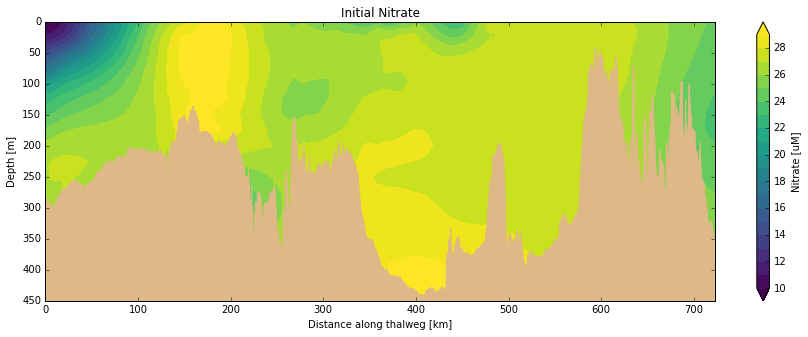

In [6]:
fig,ax = plt.subplots(1,1,figsize=(15,5))
clevels = np.arange(10., 30., 1)
cbar = vis.contour_thalweg(ax, nitrate0, bathy, lons, lats, mesh_mask, 'gdept_0', clevels, cmap='viridis')
ax.set_ylim([450,0])
cbar.set_label('Nitrate [uM]')
ax.set_title('Initial Nitrate')

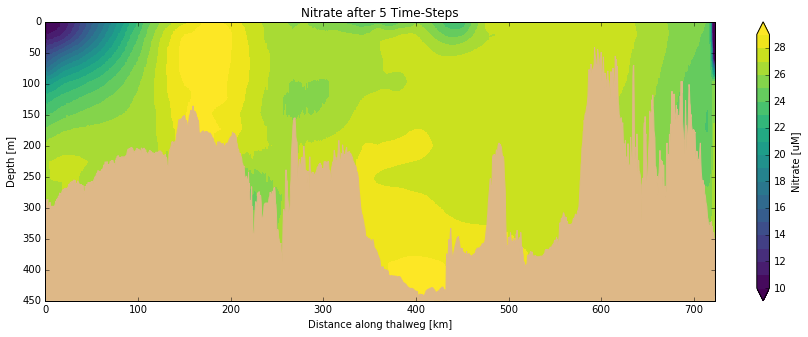

In [7]:
fig,ax = plt.subplots(1,1,figsize=(15,5))
cbar = vis.contour_thalweg(ax, nitrateF[4], bathy, lons, lats, mesh_mask, 'gdept_0', clevels, cmap='viridis')
ax.set_ylim([450,0])
cbar.set_label('Nitrate [uM]')
ax.set_title('Nitrate after 5 Time-Steps')

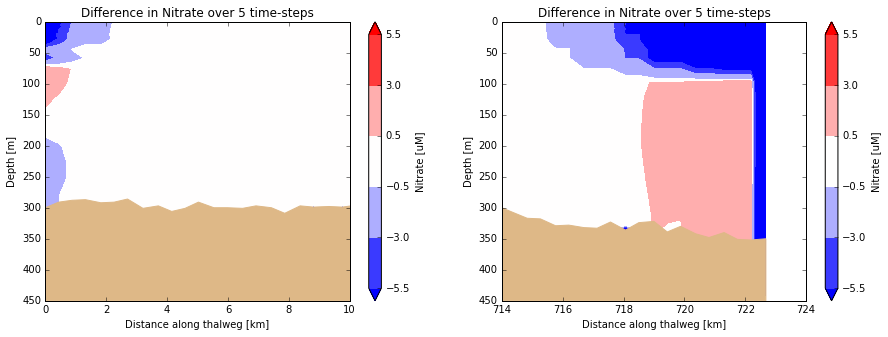

In [16]:
fig,ax = plt.subplots(1,2,figsize=(15,5))
clevels = [-5.5, -3, -0.5, 0.5, 3, 5.5]

cbar = vis.contour_thalweg(ax[0], nitrateF[4]-nitrate0, bathy, lons, lats, mesh_mask, 'gdept_0', clevels, cmap='bwr')
ax[0].set_ylim([450,0])
ax[0].set_xlim([0,10])
cbar.set_label('Nitrate [uM]')
ax[0].set_title('Difference in Nitrate over 5 time-steps')

cbar = vis.contour_thalweg(ax[1], nitrateF[4]-nitrate0, bathy, lons, lats, mesh_mask, 'gdept_0', clevels, cmap='bwr')
ax[1].set_ylim([450,0])
ax[1].set_xlim([714, 724])
cbar.set_label('Nitrate [uM]')
ax[1].set_title('Difference in Nitrate over 5 time-steps')

In [19]:
obc = '/ocean/sallen/allen/research/MEOPAR/NEMO-forcing/open_boundaries/north/bioOBC_full_north.nc'
obc_nitrate_file = nc.Dataset(obc)
obc_nitrate = obc_nitrate_file.variables['NO3'][:]
print (obc_nitrate.shape)

(2, 40, 1, 300)


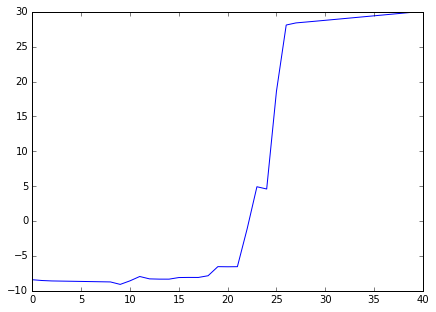

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(7,5))
ax.plot(obc_nitrate[0, :, 0, 0])

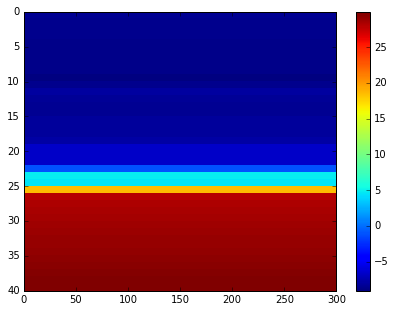

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(7,5))
mesh = ax.pcolormesh(obc_nitrate[0, :, 0, :])
fig.colorbar(mesh, ax=ax)
ax.invert_yaxis()

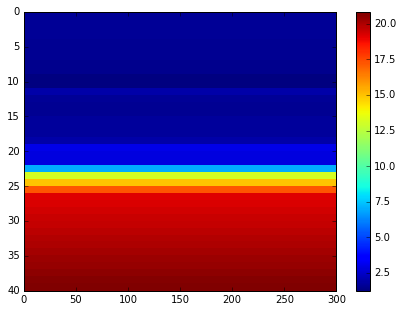

In [27]:
fig, ax = plt.subplots(1, 1, figsize=(7,5))
mesh = ax.pcolormesh(obc_nitrate[1, :, 0, :])
fig.colorbar(mesh, ax=ax)
ax.invert_yaxis()